##### <strong>Target:</strong>
- 'Other.Specified.Neurodevelopmental.Disorder.Autism.Spectrum.Disorder'
- Case: 27.23%

##### <strong>Parameters:</strong>
1. Cross Validation nubmer: 5 (just inner loop for quick result)
2. n_estimator: 100
3. max_depth: 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, log_loss

#### 1. Raw GPS data

In [3]:
my_data = pd.read_csv('/home/ubuntu/SEOYOON/KSAD/KSAD_GPS_TOTAL_v2.csv', header=0)
my_data['KEY'] = my_data['KEY'].astype(str)
len(my_data)

4567

In [4]:
target = 'Other.Specified.Neurodevelopmental.Disorder.Autism.Spectrum.Disorder'
my_data = my_data.dropna(subset=[target])
len(my_data)

4561

In [5]:
print("case number: {}".format(sum(my_data[target])))
print("case ratio: {:.2f}%".format(sum(my_data[target])/len(my_data)*100))

case number: 1242.0
case ratio: 27.23%


#### CONSTANTS:

In [6]:
k_fold = 5

num_samples = len(my_data)
each_fold_size = int(num_samples/k_fold) +1

print('num_samples: ', num_samples)
print('fold_size: ', each_fold_size)

num_samples:  4561
fold_size:  913


#### PARAMETERS:

In [7]:
X = my_data.iloc[:, 1:27]
features = X.columns
X.head()

,AD,ADHD,ASD,ASP,BIP,BMI,CANNABIS,CP,DEPRESSION,DRINK,...,IQ,MDD,NEUROTICISM,PTSD,RISK4PC,RISKTOL,SCZ,SMOKER,SNORING,WORRY
0,-5.780160,0.000318,-0.368089,-0.583751,0.003292,0.004191,-5.988192,-2.156561,0.002583,-0.106358,...,-2.917600,-2.412027,0.013433,0.000000,0.233276,-0.363054,-0.368089,0.022038,0.063292,-0.000821
1,9.133668,-0.008823,0.000000,-0.544655,0.003292,0.004191,-3.063278,-3.683131,0.002060,-0.161727,...,0.369931,1.223589,0.000064,0.017525,0.130802,-0.320289,0.000000,-0.169713,0.021098,-0.001469
2,2.059180,-0.005448,0.000000,-0.601716,0.003292,0.000000,-10.187523,-4.160142,0.006631,-0.402164,...,-4.261953,-1.434531,0.012193,0.010899,-0.271698,0.390031,0.000000,-0.088810,0.037388,-0.016278
3,8.591499,0.000838,0.000000,-0.068964,0.003292,0.000000,-0.944047,-4.682147,0.004259,-0.947712,...,-2.582771,-1.689643,0.013623,0.019801,-0.183950,-0.037689,0.000000,-0.110845,0.022991,0.000487
4,3.104598,-0.012818,0.000000,-1.211318,0.000000,0.000000,-10.269615,-4.843486,0.000878,-0.997582,...,-3.145087,0.943200,0.013695,0.000000,-0.074910,0.404019,0.000000,-0.183223,-0.008245,-0.013129


In [8]:
y = my_data[target].astype(str)
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Other.Specified.Neurodevelopmental.Disorder.Autism.Spectrum.Disorder, dtype: object

In [9]:
X = X.to_numpy()
y = y.to_numpy().ravel()

In [10]:
def plot_feature_importances(model):
    n_features = len(features)
    plt.figure(figsize=(6,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    plt.show()

----------------------------
k fold:  0


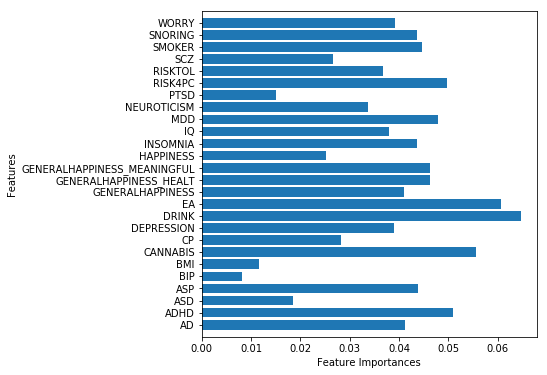

Feature Importances:
[0.0412508  0.05095492 0.01855138 0.04386169 0.0081276  0.01161647
 0.05560543 0.02817511 0.03898325 0.06464345 0.0606129  0.04101952
 0.04635379 0.04630298 0.02510233 0.04363236 0.03794529 0.04785574
 0.0337166  0.01497338 0.04980243 0.03673142 0.02667941 0.04463162
 0.04363634 0.03923376]


Train Cross Entropy Score:  0.5517185424909775
Test Cross Entropy Score:  0.5858645795781559
----------------------------
----------------------------
k fold:  0


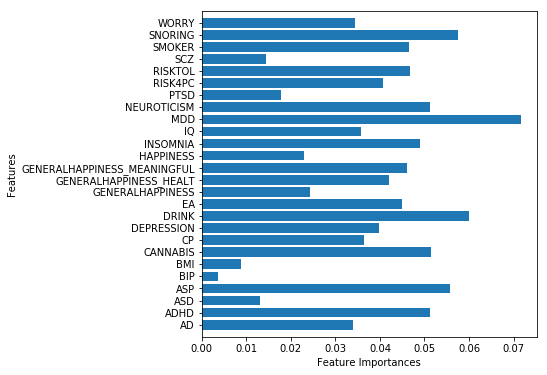

Feature Importances:
[0.03400066 0.05121809 0.01297884 0.05580701 0.00371902 0.00882723
 0.0514677  0.03650347 0.03985336 0.05990452 0.04504003 0.0242898
 0.04210546 0.04601054 0.02288662 0.04891907 0.03572243 0.07155985
 0.0511708  0.01768676 0.04059971 0.04678939 0.0145176  0.04648838
 0.05757532 0.03435832]


Train Cross Entropy Score:  0.5508718814069873
Test Cross Entropy Score:  0.5864617547781206
----------------------------
----------------------------
k fold:  0


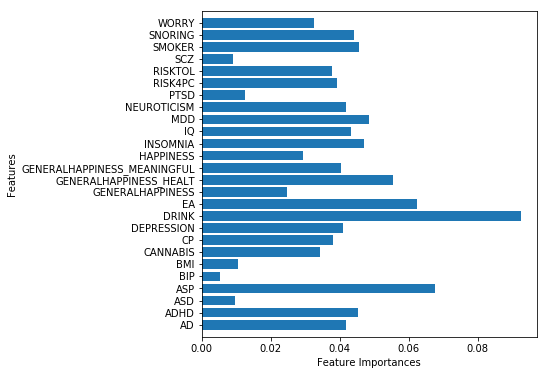

Feature Importances:
[0.04187945 0.04532879 0.00958295 0.06748261 0.0054409  0.01056461
 0.03423046 0.03816176 0.04094814 0.09242075 0.06230413 0.02481316
 0.05542042 0.04044352 0.02944307 0.04705334 0.04320242 0.04852103
 0.04170158 0.0126742  0.03914654 0.03764518 0.00919307 0.04555582
 0.04428201 0.0325601 ]


Train Cross Entropy Score:  0.5528005595103614
Test Cross Entropy Score:  0.587784077941613
----------------------------
----------------------------
k fold:  0


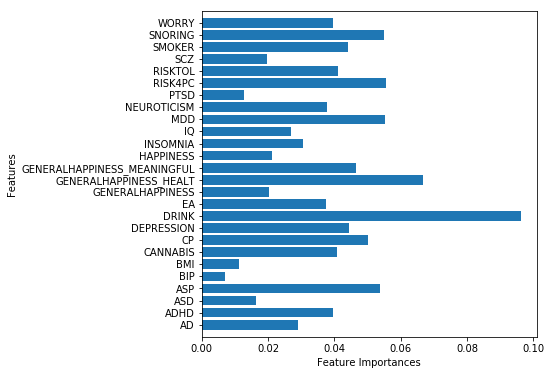

Feature Importances:
[0.0291849  0.03967572 0.01639658 0.05374544 0.00713164 0.01113274
 0.04085212 0.05028524 0.04436989 0.09615521 0.03762513 0.02027499
 0.06683951 0.04651668 0.02116382 0.03066701 0.02696359 0.05523285
 0.03783515 0.01278913 0.05559333 0.04098838 0.01970815 0.0441656
 0.05502194 0.03968528]


Train Cross Entropy Score:  0.5515661021567158
Test Cross Entropy Score:  0.5872953792863155
----------------------------
----------------------------
k fold:  0


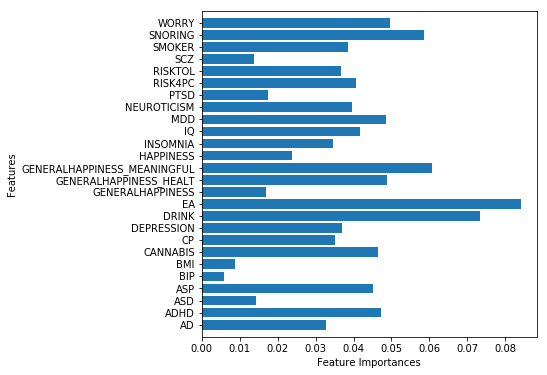

Feature Importances:
[0.03280017 0.04732397 0.01434722 0.0450152  0.00583292 0.00866437
 0.04643932 0.03519581 0.03686509 0.07325159 0.08400427 0.01704496
 0.04889673 0.06077176 0.02376807 0.03467532 0.04168722 0.04860217
 0.03957372 0.01733642 0.04070573 0.03662113 0.01366808 0.03848855
 0.05868591 0.04973431]


Train Cross Entropy Score:  0.5519474735186559
Test Cross Entropy Score:  0.5874038976373391
----------------------------


In [11]:
index_split = StratifiedKFold(n_splits=k_fold, random_state=123)

loop=0
for train_index, test_index in index_split.split(X, y):
    print('----------------------------')
    print('k fold: ', loop)
    
    train_index, test_index
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf = RandomForestClassifier(n_estimators=100, max_depth=5)
    
    rf.fit(X_train, y_train)
    y_pred_test = rf.predict_proba(X_test)
    y_pred_train = rf.predict_proba(X_train)
    plot_feature_importances(rf)
    
    print("Feature Importances:\n{}".format(rf.feature_importances_))

    print('\n')
    print('Train Cross Entropy Score: ', log_loss(y_train, y_pred_train))
#     print('Classification Report: ', classification_report(y_test, y_pred_test))
#     print('Confusion Matrix: ', confusion_matrix(y_test, y_pred_test))
    print('Test Cross Entropy Score: ', log_loss(y_test, y_pred_test))
    print('----------------------------')

Reference: https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

In [12]:
index_split = StratifiedKFold(n_splits=k_fold, random_state=123)
from sklearn.model_selection import cross_val_score

loop=0
for train_index, test_index in index_split.split(X, y):
    print('----------------------------')
    print('k fold: ', loop)
    
    train_index, test_index
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf = RandomForestClassifier(n_estimators=100, max_depth=5)
    
    rf.fit(X_train, y_train)
    y_pred_test = rf.predict(X_test)
    
#     cv_score = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')
    
    print("=== Confusion Matrix ===")
    print(confusion_matrix(y_test, y_pred_test))
    print('\n')
    print("=== Classification Report ===")
    print(classification_report(y_test, y_pred_test))
    print('\n')
    print("=== Accuracy Score ===")
    print(accuracy_score(y_test, y_pred_test))
#     print("=== All AUC Scores ===")
#     print(cv_score)
#     print('\n')
#     print("=== Mean AUC Score ===")
#     print("Mean AUC Score - Random Forest: ", cv_score.mean())

----------------------------
k fold:  0
=== Confusion Matrix ===
[[664   0]
 [249   0]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.73      1.00      0.84       664
        1.0       0.00      0.00      0.00       249

avg / total       0.53      0.73      0.61       913



=== Accuracy Score ===
0.7272727272727273
----------------------------
k fold:  0


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


=== Confusion Matrix ===
[[664   0]
 [249   0]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.73      1.00      0.84       664
        1.0       0.00      0.00      0.00       249

avg / total       0.53      0.73      0.61       913



=== Accuracy Score ===
0.7272727272727273
----------------------------
k fold:  0


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


=== Confusion Matrix ===
[[664   0]
 [248   0]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.73      1.00      0.84       664
        1.0       0.00      0.00      0.00       248

avg / total       0.53      0.73      0.61       912



=== Accuracy Score ===
0.7280701754385965
----------------------------
k fold:  0


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


=== Confusion Matrix ===
[[664   0]
 [248   0]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.73      1.00      0.84       664
        1.0       0.00      0.00      0.00       248

avg / total       0.53      0.73      0.61       912



=== Accuracy Score ===
0.7280701754385965
----------------------------
k fold:  0


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


=== Confusion Matrix ===
[[663   0]
 [248   0]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.73      1.00      0.84       663
        1.0       0.00      0.00      0.00       248

avg / total       0.53      0.73      0.61       911



=== Accuracy Score ===
0.7277716794731065


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### <strong>Parameters:</strong>
1. Cross Validation nubmer: 5 (just inner loop for quick result)
2. n_estimator: 100
3. max_depth: 5

In [49]:
for i in range(len(y)):
    if y[i] is "O":
        y[i] = 1
    elif y[i] is "X":
        y[i] = 0
    else:
        print(y[i])

In [54]:
y = y.astype(int)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score



--------------------------------------------------
Loop:  1


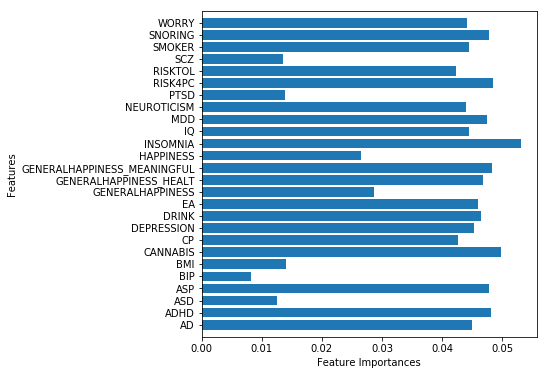

1. Feature Importances.......................
	 [0.04493615 0.04823742 0.01253319 0.04775786 0.00818581 0.0140079
 0.04984881 0.04269974 0.04530193 0.04651493 0.04599517 0.02876482
 0.04689128 0.04826687 0.02658816 0.05308198 0.04447404 0.04742439
 0.0439482  0.01380778 0.04841679 0.0423109  0.0135488  0.04445319
 0.04783784 0.04416604]
2. best train parameter......................
	 {'max_depth': 20, 'n_estimators': 60}
3. best train score..........................
	 0.51269265320857


4. ROC-AUC...................................
	 0.501937984496124
5. f1 score..................................
	 0.007722007722007722
6. Confusion matrix..........................
[[655   0]
 [257   1]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.72      1.00      0.84       655
          1       1.00      0.00      0.01       258

avg / total       0.80      0.72      0.60       913

8. Accuracy score..........................

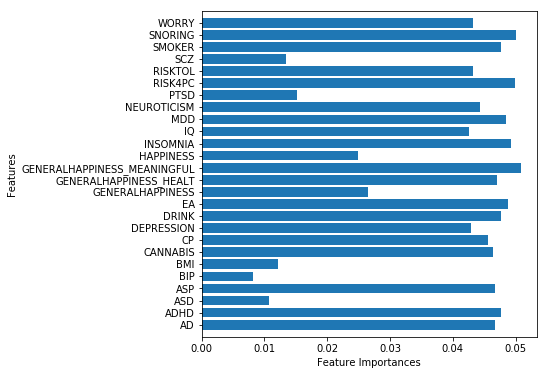

1. Feature Importances.......................
	 [0.04674501 0.04763445 0.01074719 0.04678929 0.00813094 0.01222986
 0.04646354 0.04561324 0.04283324 0.04766504 0.04871303 0.02654752
 0.04700257 0.0507929  0.02488837 0.04919234 0.04263609 0.04848035
 0.04441068 0.01513994 0.0499291  0.04327108 0.01336069 0.04761171
 0.05000615 0.04316569]
2. best train parameter......................
	 {'max_depth': 40, 'n_estimators': 60}
3. best train score..........................
	 0.5217762652654041


4. ROC-AUC...................................
	 0.5031276918050317
5. f1 score..................................
	 0.015384615384615385
6. Confusion matrix..........................
[[654   1]
 [255   2]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.72      1.00      0.84       655
          1       0.67      0.01      0.02       257

avg / total       0.70      0.72      0.60       912

8. Accuracy score......................

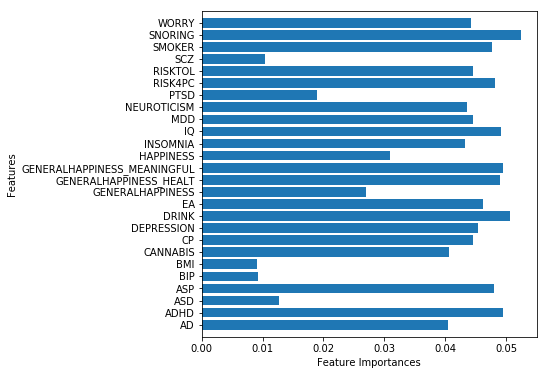

1. Feature Importances.......................
	 [0.04050637 0.04948334 0.01268843 0.04794356 0.00921204 0.00915306
 0.04069315 0.04454007 0.04531721 0.05072644 0.04619904 0.0269628
 0.04903892 0.04948186 0.03094952 0.04317893 0.0491742  0.0446162
 0.04362525 0.01900206 0.04815415 0.04455304 0.01046387 0.04776736
 0.05238868 0.04418044]
2. best train parameter......................
	 {'max_depth': 40, 'n_estimators': 40}
3. best train score..........................
	 0.5104224050102859


4. ROC-AUC...................................
	 0.4984779299847793
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[655   2]
 [255   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.72      1.00      0.84       657
          1       0.00      0.00      0.00       255

avg / total       0.52      0.72      0.60       912

8. Accuracy score............................
	 0.71820175

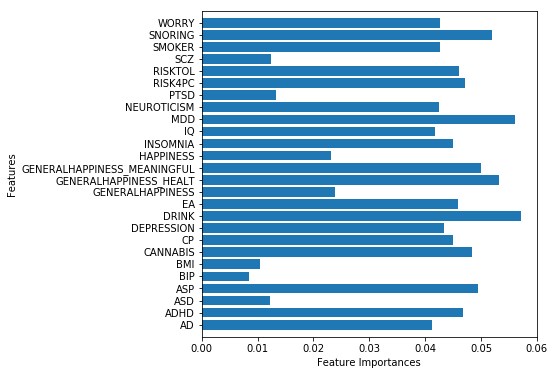

1. Feature Importances.......................
	 [0.04126585 0.04668611 0.01224584 0.04937959 0.00852707 0.01036705
 0.04845859 0.04497241 0.04329829 0.05707123 0.04588574 0.02385553
 0.0531788  0.05001447 0.02307699 0.04495506 0.04177198 0.05612257
 0.04247999 0.01333379 0.04711137 0.04607613 0.01247414 0.04273465
 0.05192853 0.04272824]
2. best train parameter......................
	 {'max_depth': 10, 'n_estimators': 180}
3. best train score..........................
	 0.523737630359939


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[665   0]
 [247   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.73      1.00      0.84       665
          1       0.00      0.00      0.00       247

avg / total       0.53      0.73      0.61       912

8. Accuracy score............................
	 0.7291666666666666


--

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


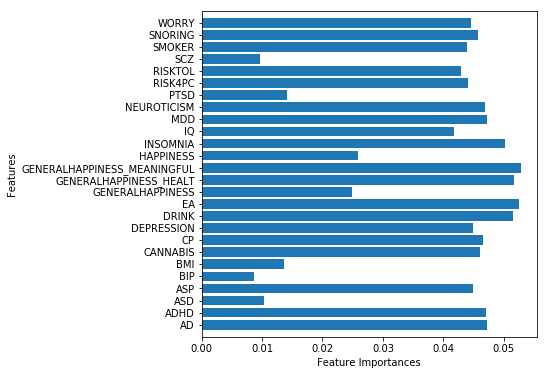

1. Feature Importances.......................
	 [0.04730155 0.04709401 0.01028143 0.04485277 0.00874246 0.01365633
 0.04614453 0.04650399 0.04495399 0.05155651 0.05252268 0.02496773
 0.05175725 0.05279756 0.0258169  0.05022696 0.04182313 0.04721383
 0.04688284 0.01407919 0.04413277 0.04290312 0.00957582 0.04386159
 0.04581273 0.04453832]
2. best train parameter......................
	 {'max_depth': 80, 'n_estimators': 60}
3. best train score..........................
	 0.5165323562859042


4. ROC-AUC...................................
	 0.4978165938864629
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[684   3]
 [225   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.75      1.00      0.86       687
          1       0.00      0.00      0.00       225

avg / total       0.57      0.75      0.65       912

8. Accuracy score............................
	 0.75


In [72]:
import os
inner_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
outer_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
loop=1
for train_index, test_index in outer_cv.split(X, y):
    print('\n')
    print('-'*50)
    print('Loop: ', loop)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #No Tuning
#     rf = RandomForestClassifier(n_estimators= 100, min_samples_leaf=5)
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
    
    #Tuning
    params = {'n_estimators': np.arange(20, 200, 20),
              'max_depth': np.arange(10, 100, 10)}
    rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = inner_cv, scoring='roc_auc', n_jobs=-1, return_train_score=True)
    rf_grid.fit(X_train, y_train)
    y_pred=rf_grid.predict(X_test)
    
    result = pd.DataFrame(rf_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
    if not os.path.exists("./TuningResult/"):
        os.mkdir("./TuningResult/")
    filename = "TuningResult/KSAD_6_HT"+str(loop)+".csv"
    result.to_csv(filename, index=False)
    
    best_est = rf_grid.best_estimator_
    plot_feature_importances(best_est)
    
    print("{:.<45}".format("1. Feature Importances"))
    print("\t",best_est.feature_importances_)
    
    print("{:.<45}".format("2. best train parameter"))
    print("\t",rf_grid.best_params_)
    print("{:.<45}".format("3. best train score"))
    print("\t",rf_grid.best_score_)
    
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("{:.<45}".format("4. ROC-AUC"))
    print("\t",roc_auc)
    
    f1 = f1_score(y_test, y_pred, average='binary')
    print("{:.<45}".format("5. f1 score"))
    print("\t",f1)
    print("{:.<45}".format("6. Confusion matrix"))
    print(confusion_matrix(y_test, y_pred))
    print("{:.<45}".format("7. Classify report"))
    print(classification_report(y_test, y_pred))
    print("{:.<45}".format("8. Accuracy score"))
    print("\t",accuracy_score(y_test, y_pred))
    
    loop += 1